In [1]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("broom")
install.packages("ggpubr")
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/5g/f2h34wr978v84jlkwyjd1thm0000gn/T//RtmpGLVEPb/downloaded_packages

The downloaded binary packages are in
	/var/folders/5g/f2h34wr978v84jlkwyjd1thm0000gn/T//RtmpGLVEPb/downloaded_packages

The downloaded binary packages are in
	/var/folders/5g/f2h34wr978v84jlkwyjd1thm0000gn/T//RtmpGLVEPb/downloaded_packages

The downloaded binary packages are in
	/var/folders/5g/f2h34wr978v84jlkwyjd1thm0000gn/T//RtmpGLVEPb/downloaded_packages

The downloaded binary packages are in
	/var/folders/5g/f2h34wr978v84jlkwyjd1thm0000gn/T//RtmpGLVEPb/downloaded_packages


In [2]:
library(ggplot2)
library(dplyr)
library(broom)
library(ggpubr)
library(glmnet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loaded glmnet 4.1-8



In [3]:
housing_data = read.csv("train.csv")

head(housing_data[1:5,1:25])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd


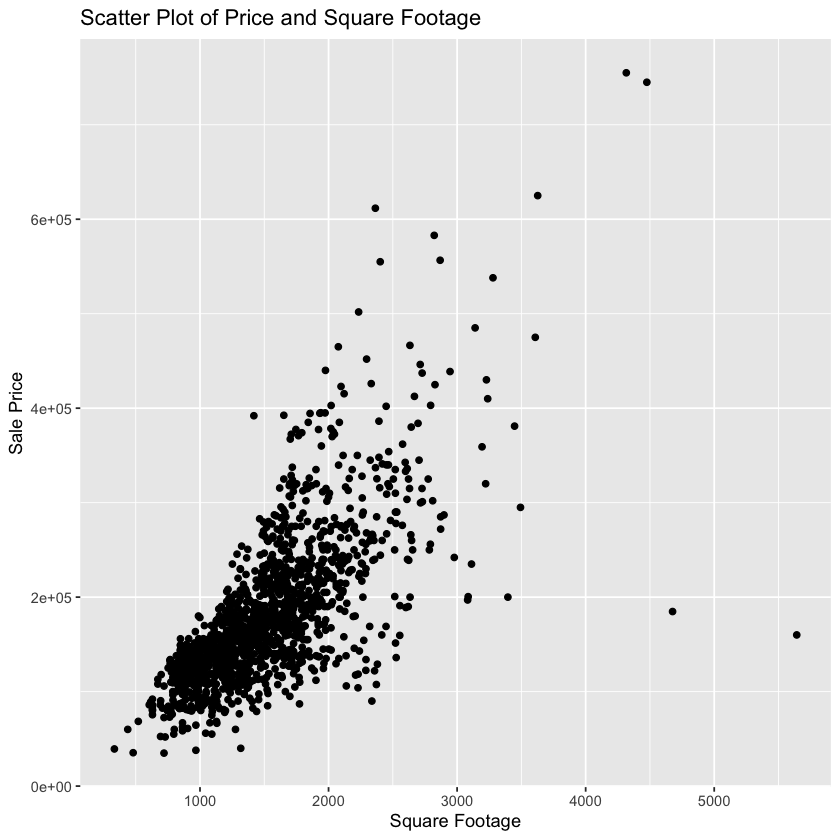

In [4]:
# Load ggplot2
library(ggplot2)

# Plotting Sale Price and Sqaure Footage columns
ggplot(housing_data, aes(x = GrLivArea, y = SalePrice)) +
  geom_point() +
  labs(title = "Scatter Plot of Price and Square Footage", x = "Square Footage", y = "Sale Price")

# Linear relationship. As square footage goes up, so does price.

Warning message in geom_smooth(linear = "lm", se = FALSE, color = "blue"):
“Ignoring unknown parameters: `linear`”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'



Call:
lm(formula = GrLivArea ~ SalePrice, data = housing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1170.4  -255.2   -52.7   187.5  4224.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.674e+02  2.415e+01   27.64   <2e-16 ***
SalePrice   4.687e-03  1.222e-04   38.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 370.9 on 1458 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5018 
F-statistic:  1471 on 1 and 1458 DF,  p-value: < 2.2e-16


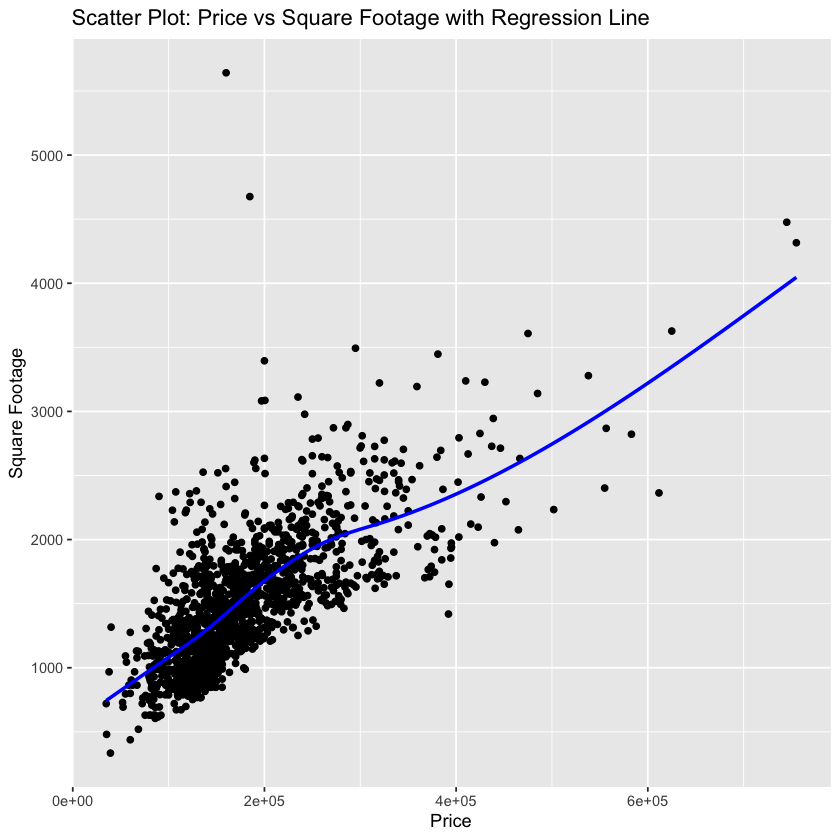

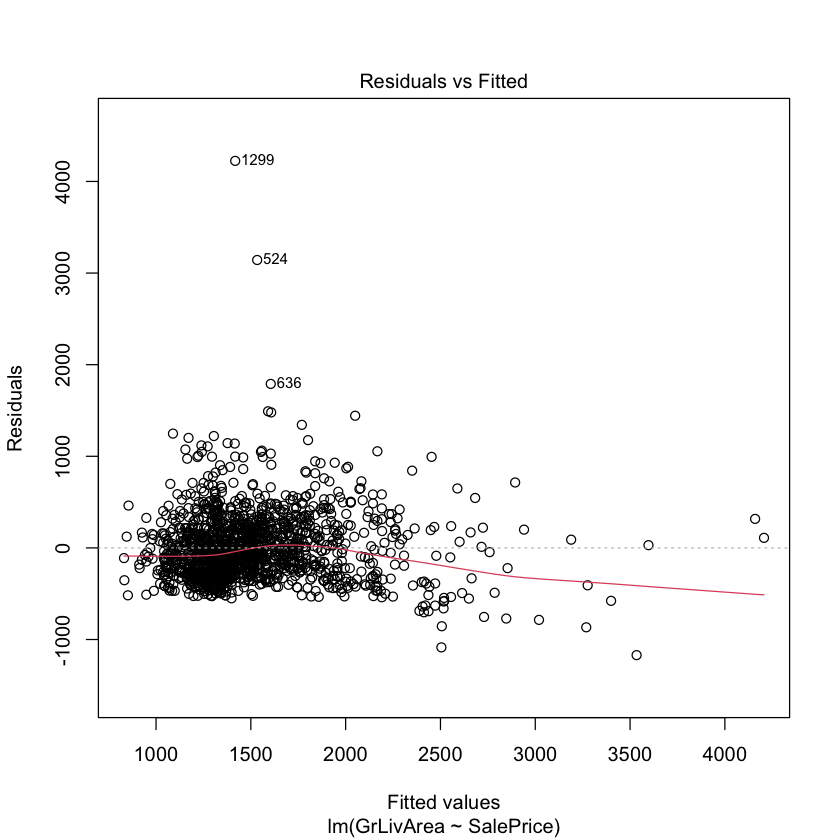

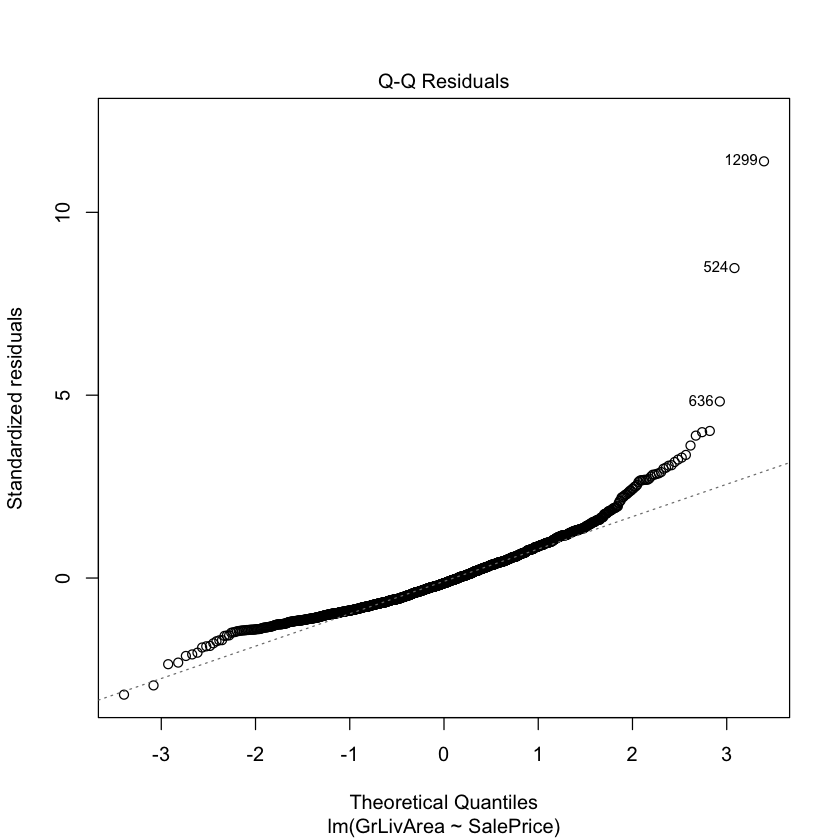

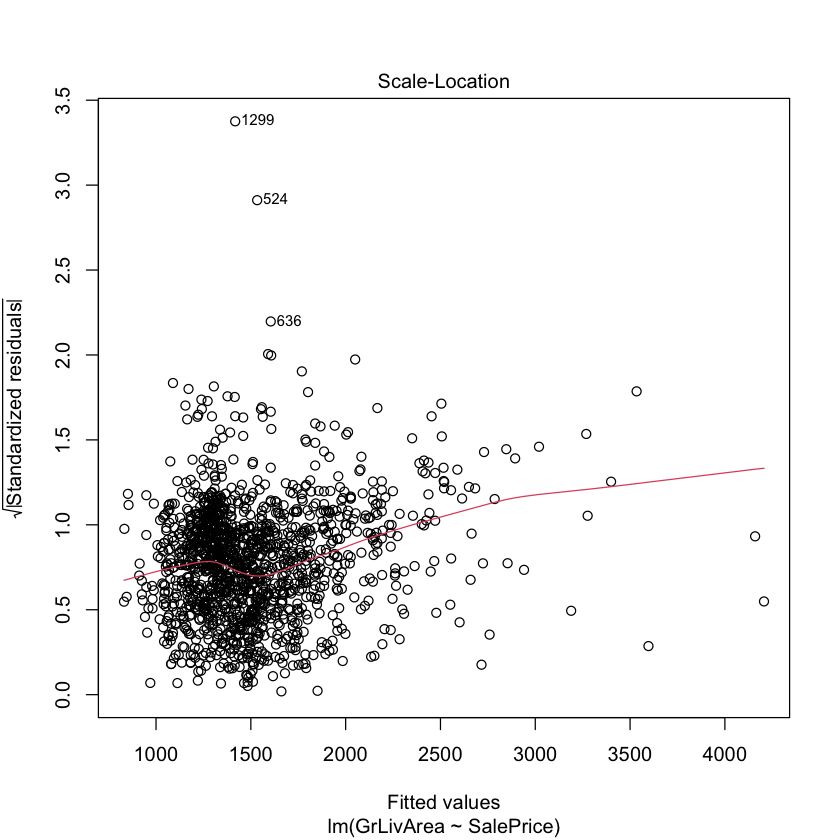

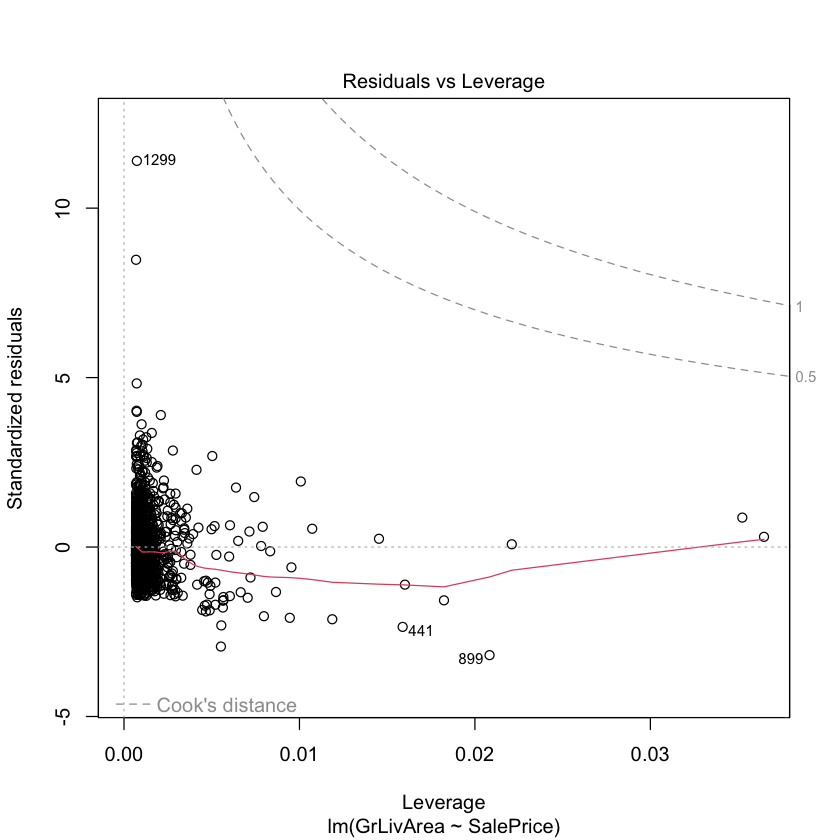

In [5]:
# Linear regression (simple regression)
linear = lm(GrLivArea ~ SalePrice, data = housing_data)

# Regression equation
equation = summary(linear)$coefficients

# Plot again with linear regression line
ggplot(housing_data, aes(x = SalePrice, y = GrLivArea)) +
  geom_point() +
  geom_smooth(linear = "lm", se = FALSE, color = "blue") +
  labs(title = "Scatter Plot: Price vs Square Footage with Regression Line",
       x = "Price", y = "Square Footage")

summary(linear)

plot(linear)

[1] 0.2631162

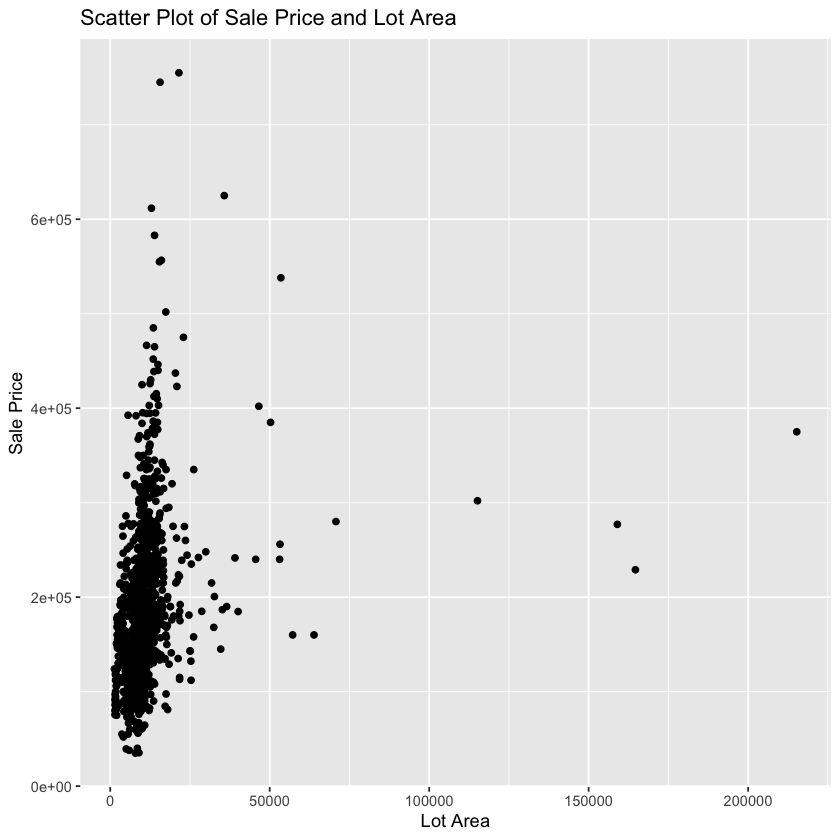

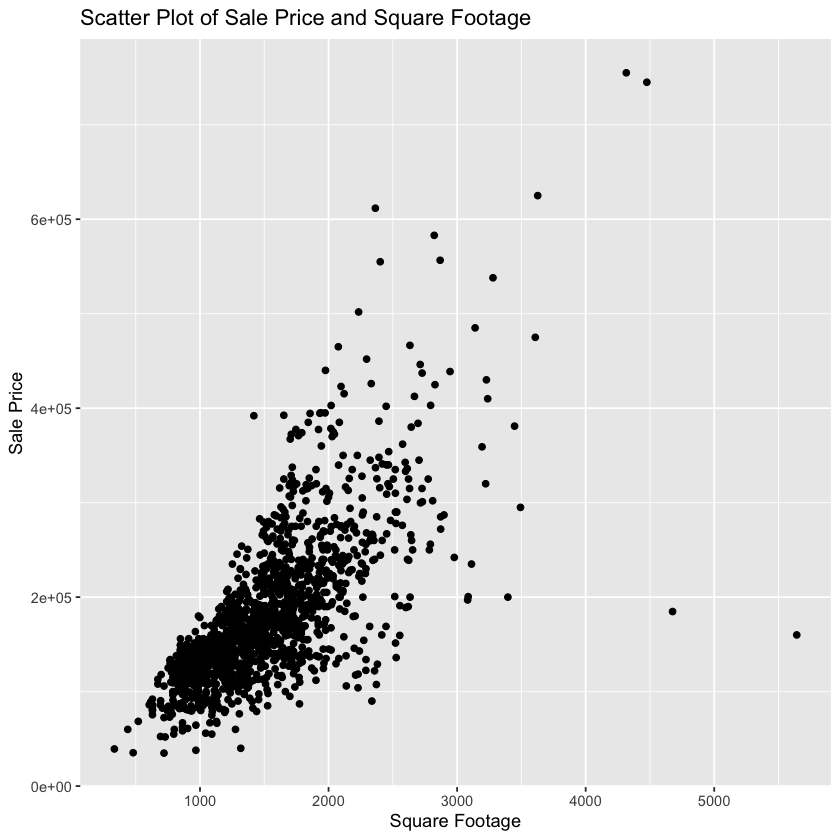

In [6]:
# Linear regression (multiple regression)

# Checking the correlation between the independent variables
cor(housing_data$GrLivArea, housing_data$LotArea)

# Check linearity
ggplot(housing_data, aes(x = LotArea, y = SalePrice)) +
  geom_point() +
  labs(title = "Scatter Plot of Sale Price and Lot Area", x = "Lot Area", y = "Sale Price")

ggplot(housing_data, aes(x = GrLivArea, y = SalePrice)) +
  geom_point() +
  labs(title = "Scatter Plot of Sale Price and Square Footage", x = "Square Footage", y = "Sale Price")

# I see a linearity in both as well as no correlation.


Call:
lm(formula = SalePrice ~ GrLivArea + LotArea, data = housing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-484670  -28754   -1276   21561  341049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.662e+04  4.475e+03   3.714 0.000212 ***
GrLivArea   1.038e+02  2.878e+00  36.076  < 2e-16 ***
LotArea     6.618e-01  1.515e-01   4.368 1.34e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55730 on 1457 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.5079 
F-statistic:   754 on 2 and 1457 DF,  p-value: < 2.2e-16


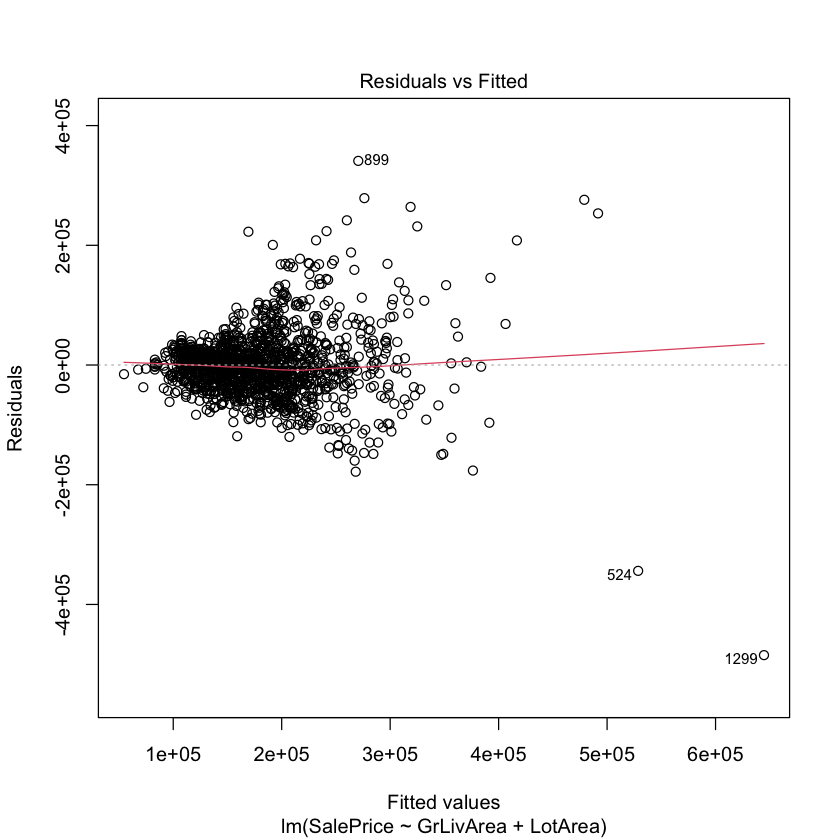

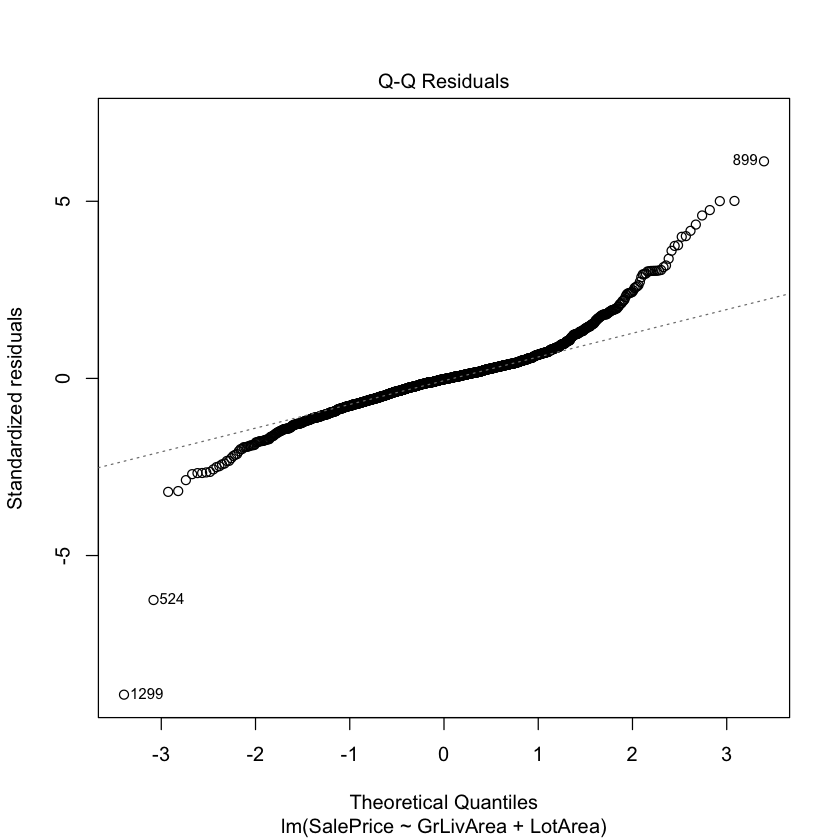

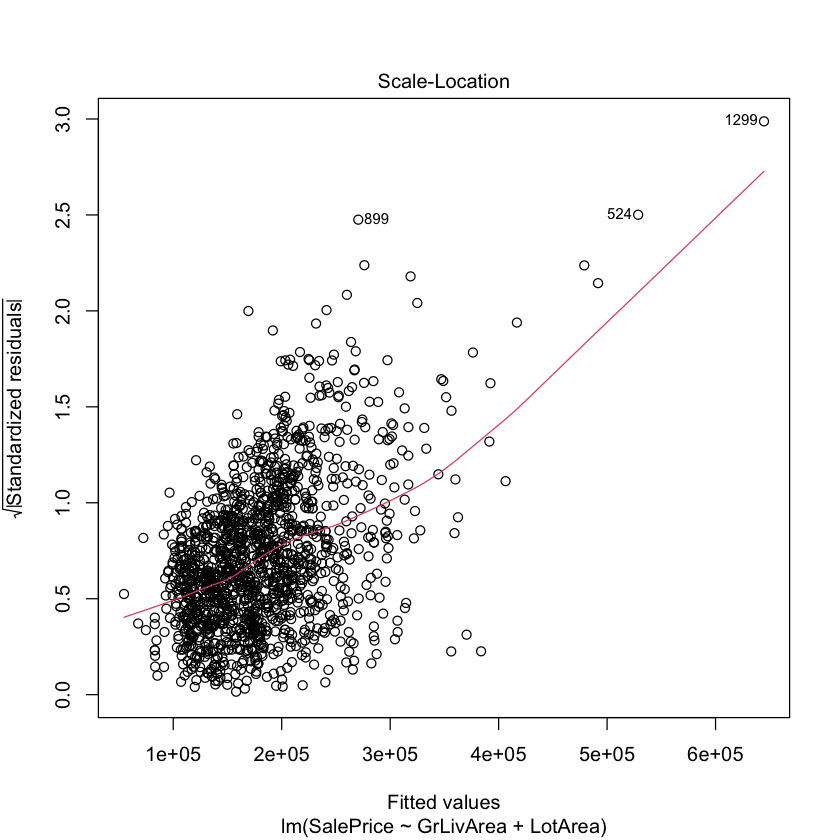

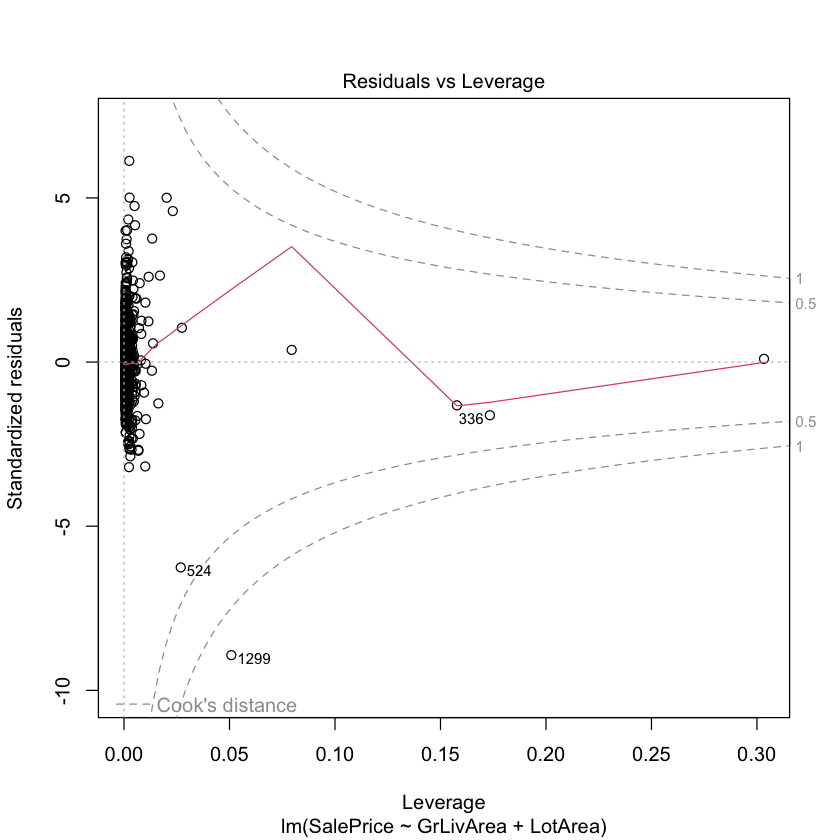

In [7]:
# Multiple regression

multi_linear = lm(SalePrice ~ GrLivArea + LotArea, data = housing_data)

summary(multi_linear)

plot(multi_linear)

In [8]:
# Create a new dataframe with information needed to visualize
plotting_data = expand.grid(
  GrLivArea = seq(min(housing_data$GrLivArea), max(housing_data$GrLivArea), length.out = 30),
  LotArea = c(min(housing_data$LotArea), mean(housing_data$LotArea), max(housing_data$LotArea))
)

# Make predictions based on linear model
plotting_data$predicted.y = predict.lm(multi_linear, newdata = plotting_data)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


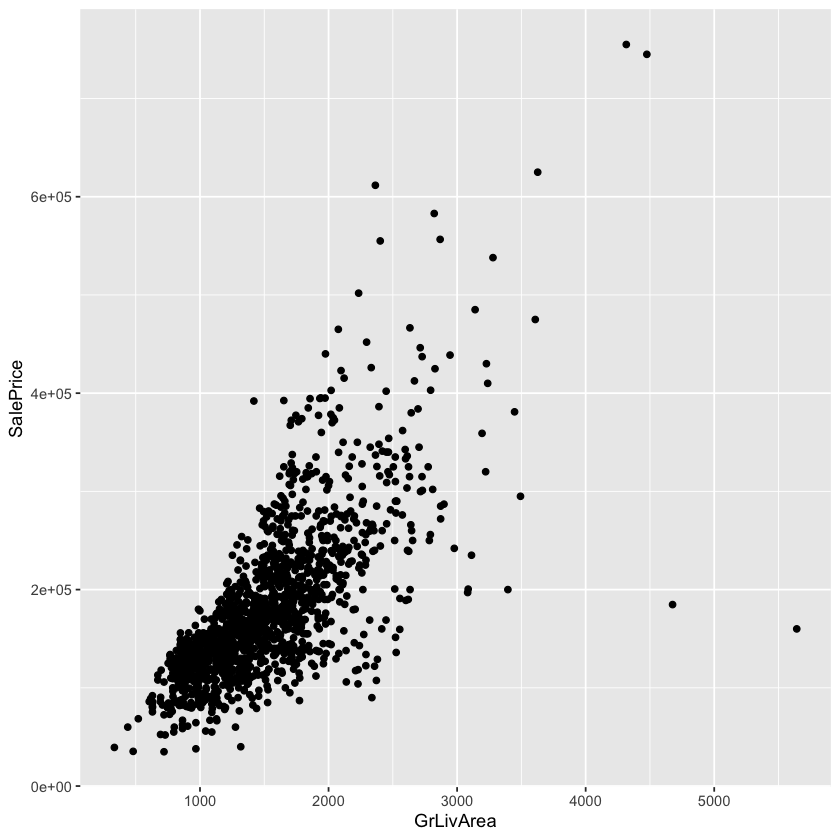

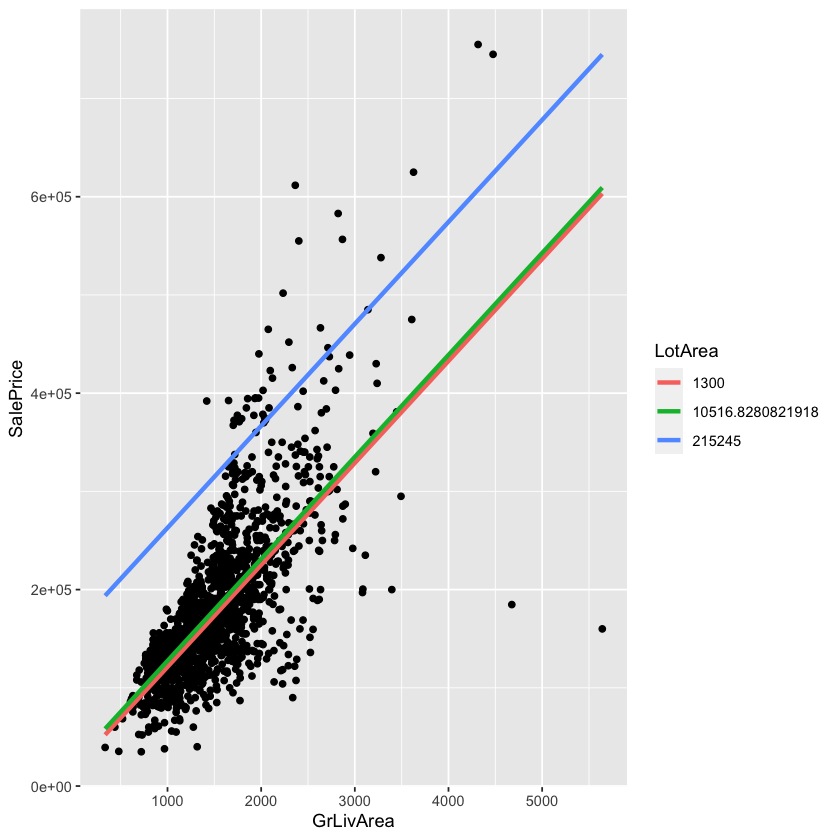

In [9]:
# Make Lot Area a factor
plotting_data$LotArea = as.factor(plotting_data$LotArea)

# Plot original data first
sale_plot = ggplot(housing_data, aes(x = GrLivArea, y = SalePrice)) +
  geom_point()

sale_plot

# Add regression lines

sale_plot = sale_plot +
  geom_line(data = plotting_data, aes(x = GrLivArea, y = predicted.y, color = LotArea), size = 1.25)

sale_plot

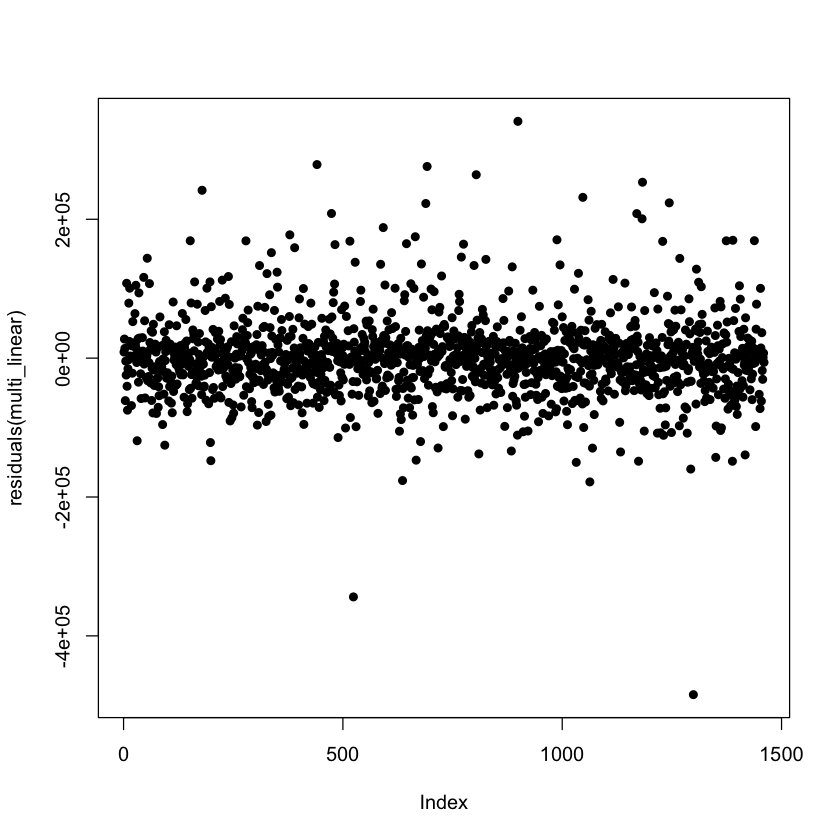

In [10]:
#### Attempts of improving model ####

# One thing I can do is check residuals
plot(residuals(multi_linear), pch = 16)

Optimal lambda: 5627.562 


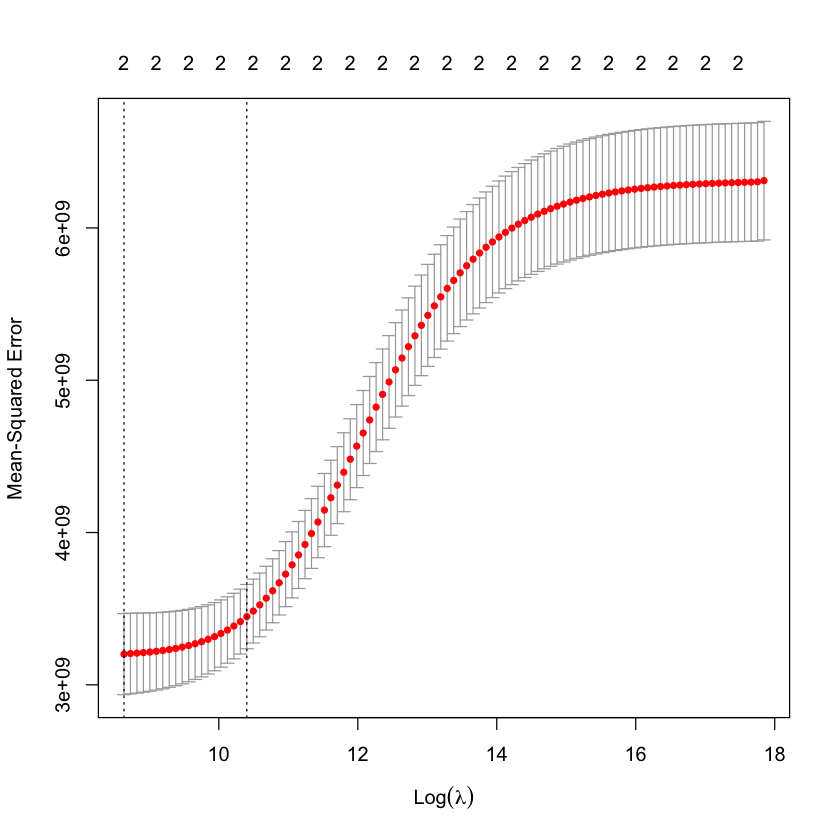

In [11]:
# Ridge regression
ridge_model = cv.glmnet(as.matrix(housing_data[, c("GrLivArea", "OverallCond")]), 
                          housing_data$SalePrice, alpha = 0)

# Print the optimal lambda (lambda.min)
cat("Optimal lambda:", ridge_model$lambda.min, "\n")

# Plot
plot(ridge_model)